In [ ]:
# Add all your imports here

import os
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib as mpl
import matplotlib.pyplot as plt
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from wordcloud import WordCloud

%matplotlib inline

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/siddiqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/siddiqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
project_path = os.getcwd() + '/'

DATA_PATH = 'data/'
browser_data_path = DATA_PATH
pycharm_data_path = project_path + DATA_PATH

# selected_data_path = browser_data_path
selected_data_path = pycharm_data_path

kaggle_data_path = selected_data_path + 'kaggle_spam.csv'
dit_data_path = selected_data_path + 'dit_spam.xml'


In [4]:
kaggle_data = pd.read_csv(kaggle_data_path, encoding='latin-1')

kaggle_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Converts XML to DF

def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
            all_records.append(record)
    return pd.DataFrame(all_records)

In [6]:
dit_data_xml = open(dit_data_path).read()

dit_data = xml2df(dit_data_xml)

dit_data.head()

,class,date,number,source,text
0,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...
4,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...


In [7]:
kaggle_cleansed_data = kaggle_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
kaggle_cleansed_data = kaggle_cleansed_data.rename(columns={'v1': 'class', 'v2': 'message'})


dit_cleansed_data = dit_data.drop(['date', 'number', 'source'], axis=1)
dit_cleansed_data = dit_cleansed_data.rename(columns={'text': 'message'})

In [10]:
kaggle_cleansed_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dit_cleansed_data.head()

,class,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,FreeMsg Hey there darling it's been 3 week's n...
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [11]:
combined_norm_data = pd.concat([kaggle_cleansed_data, dit_cleansed_data], ignore_index=True)

combined_norm_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
combined_norm_data.groupby('class').describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">message</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>unique</th>
      <th>top</th>
      <th>freq</th>
    </tr>
    <tr>
      <th>class</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ham</th>
      <td>4825</td>
      <td>4516</td>
      <td>Sorry, I'll call later</td>
      <td>30</td>
    </tr>
    <tr>
      <th>spam</th>
      <td>5954</td>
      <td>1590</td>
      <td>Camera - You are awarded a SiPix Digital Camer...</td>
      <td>6</td>
    </tr>
  </tbody>
</table>
</div>

In [13]:
combined_norm_data['length'] = combined_norm_data['message'].apply(len)
combined_norm_data.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca71540390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca6e1cb990>], dtype=object)

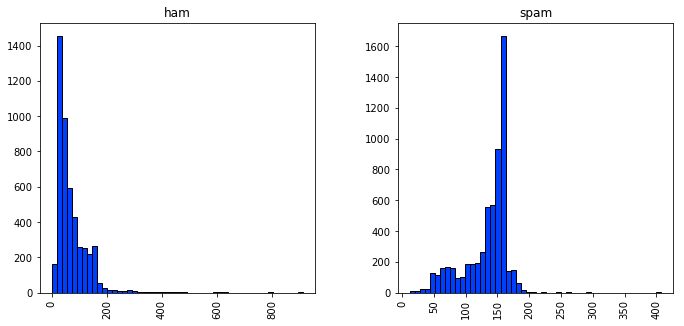

In [13]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
combined_norm_data.hist(column='length', by='class', bins=50,figsize=(11,5))


In [14]:
message_df = combined_norm_data.copy().drop(['length'], axis=1)

message_df.head()


,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)


In [17]:
def process_text(text):
    
    text = strip_punctuation(text)
    text = [word for word in text.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
    
    return " ".join(text)

In [18]:
message_df['message'] = message_df['message'].apply(process_text)

message_df.head()

,class,message
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah dont think goes usf lives around though


In [19]:
spam_df = message_df[message_df['class'] == 'spam']
ham_df = message_df[message_df['class'] == 'ham']

In [20]:
ham_words = ''
spam_words = ''

for val in spam_df['message']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham_df['message']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [21]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

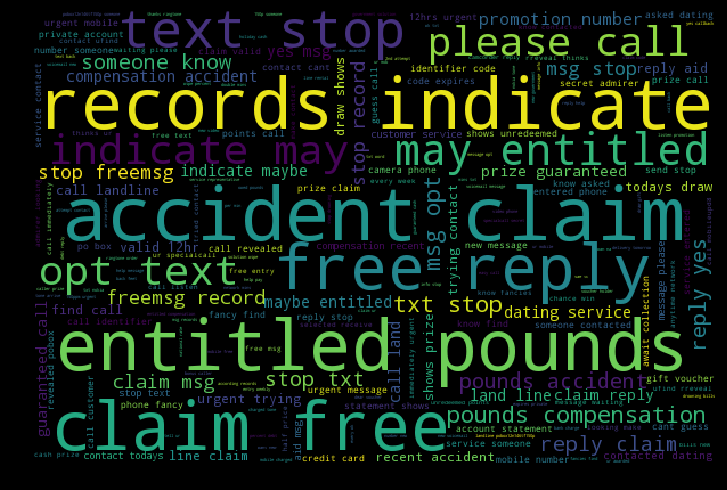

In [22]:
#Spam Word cloud

plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

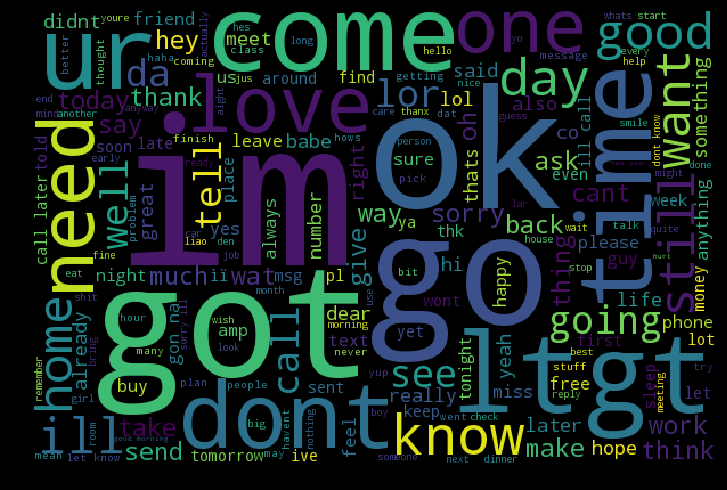

In [23]:
#Ham word cloud

plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
vectorizer = TfidfVectorizer("english")

In [25]:
features = vectorizer.fit_transform(message_df['message'])

In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(features, message_df['class'], test_size=0.3, random_state=111)

In [44]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=5)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [45]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc
}

In [45]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [47]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [52]:
pred_scores = []
pred = {}

for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred[k] = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred[k])]))

In [53]:
predicted_original = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Original_Estimator'])
predicted_original

,Original_Estimator
ETC,0.994743
RF,0.994743
BgC,0.969079
LR,0.949289
AdaBoost,0.931045
NB,0.979592
SVC,0.983921
DT,0.969079
KN,0.915275


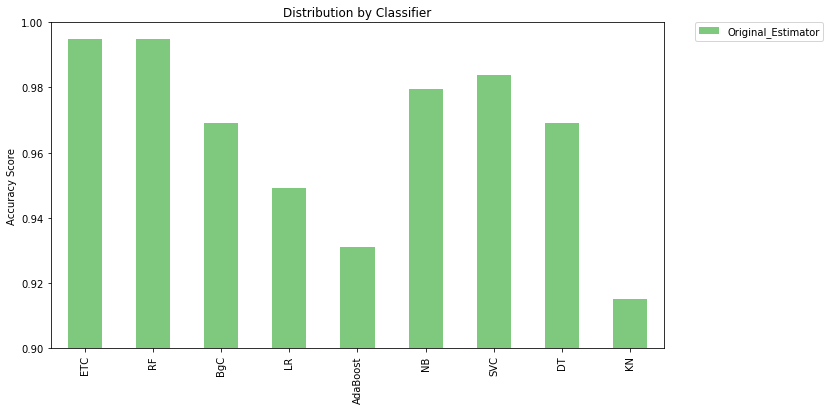

In [55]:
predicted_original.plot(kind='bar', ylim=(0.9, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(9), predicted_original.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
conf_mat = confusion_matrix(labels_test, pred['KN'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]